In [1]:
## importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\termdeposit_train.csv")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
print(df.shape)

(31647, 18)


In [4]:
df.drop_duplicates(inplace=True)
df.shape

(31647, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.6+ MB


In [6]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
int_columns = df.select_dtypes(include=['int','float']).columns
int_columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

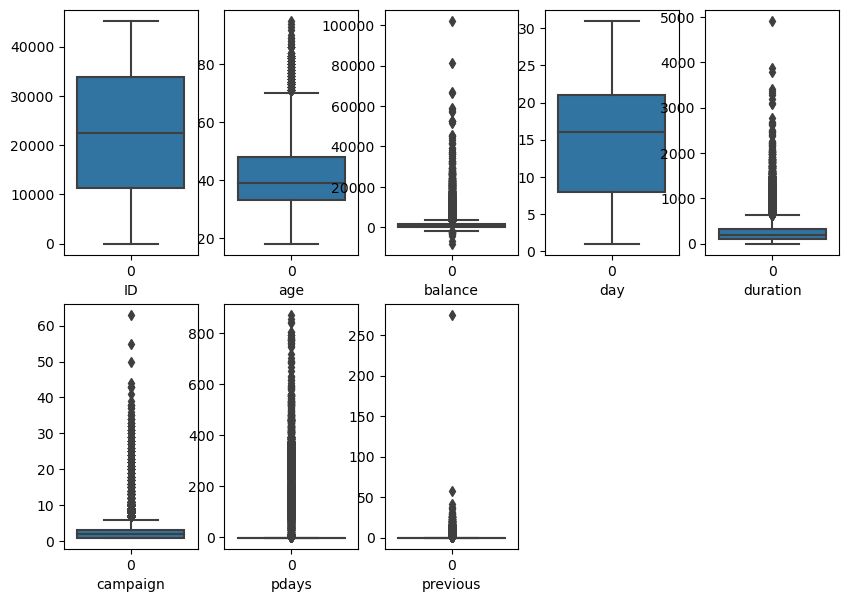

In [9]:
plt.figure(figsize=(10,7))
num =1

for column in int_columns:
    if num<=10:
        ax = plt.subplot(2,5,num)
        sns.boxplot(df[column])
        plt.xlabel(column)
    num +=1
plt.show()

In [10]:
from scipy.stats import zscore

In [11]:
z=np.abs(zscore(df.drop(object_columns,axis=1)))
z.head()

,ID,age,balance,day,duration,campaign,pdays,previous
0,0.271192,1.415793,0.187933,0.379579,0.832754,0.245906,0.408555,0.237059
1,1.377516,0.937156,0.449397,0.499526,0.649957,0.245906,0.408555,0.237059
2,0.554001,1.313627,0.156159,0.259631,0.070449,0.567059,0.408555,0.237059
3,1.636469,1.509911,0.635055,0.739422,2.368149,0.567059,0.447299,1.001336
4,0.556606,0.937156,0.411091,1.419637,0.474054,0.567059,0.408555,0.237059


In [12]:
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([5, 2, 6, ..., 6, 7, 4], dtype=int64))

In [13]:
print(z.iloc[21,5])
print(z.iloc[26,2])

9.70983664417751
5.299785542835557


In [14]:
df = df[(z<3).all(axis=1)]
df.shape

(28124, 18)

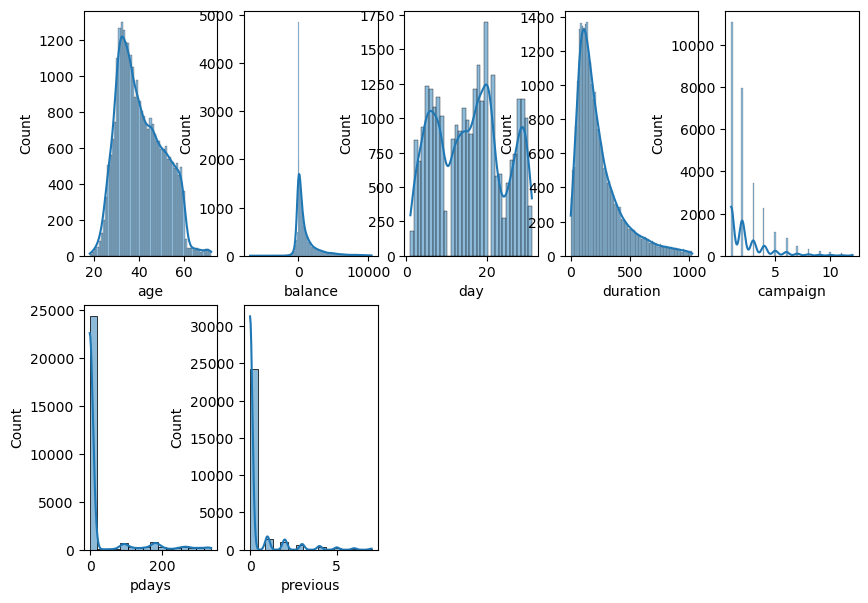

In [15]:
plt.figure(figsize=(10,7))
num =1

for column in int_columns.drop("ID"):
    if num<=10:
        ax = plt.subplot(2,5,num)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
    num +=1
plt.show()

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()

In [18]:
for i in object_columns:
    lb.fit(df[i])
    df[i] = lb.transform(df[i])

In [19]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


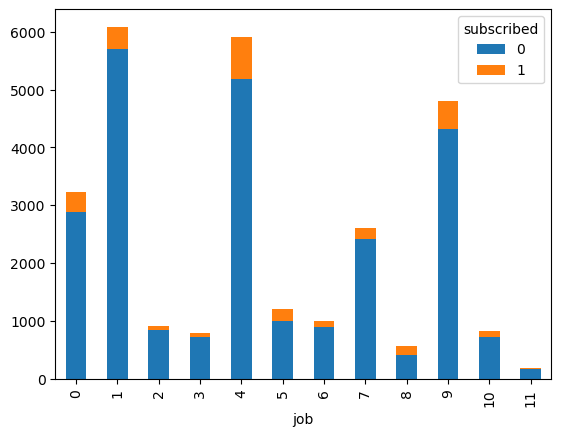

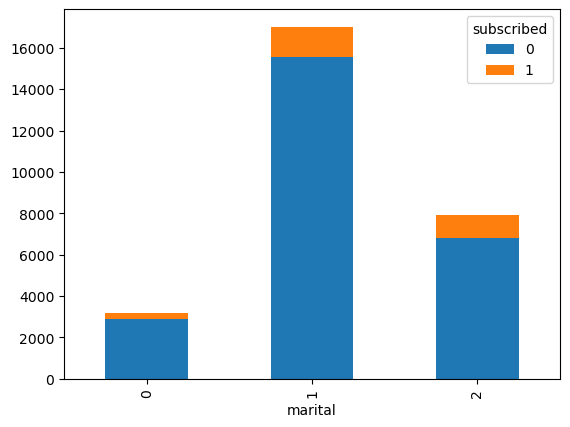

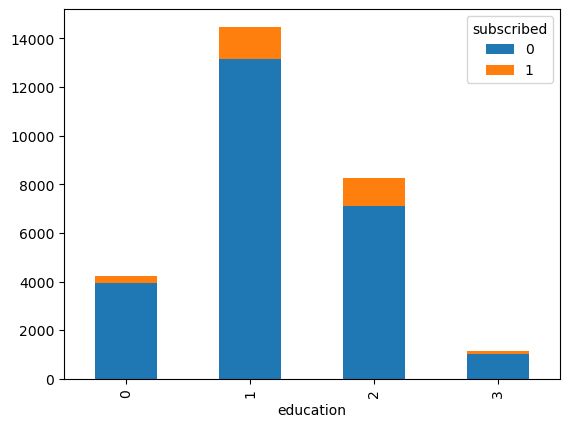

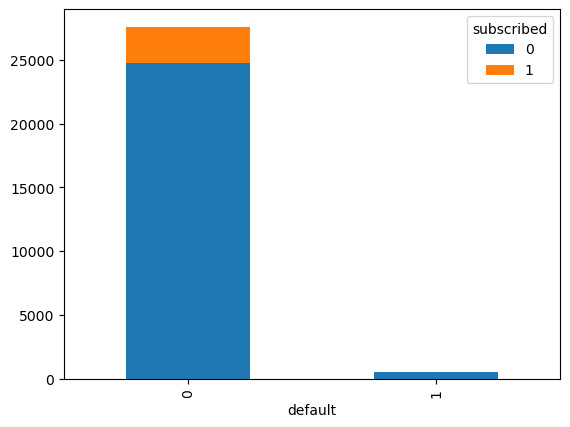

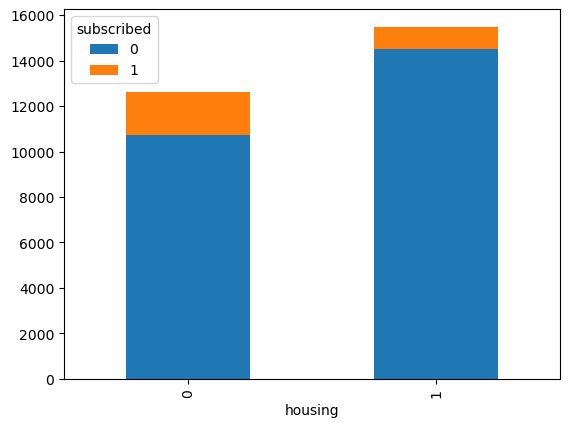

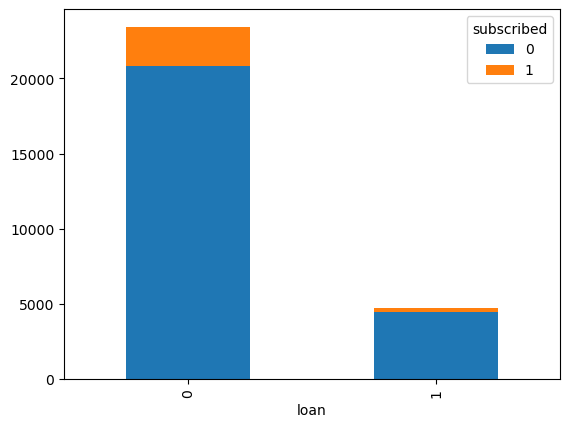

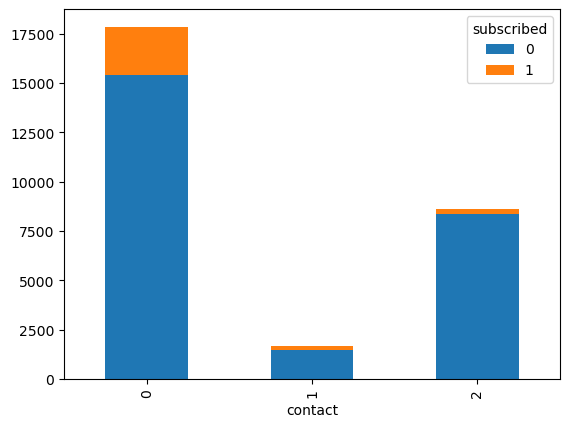

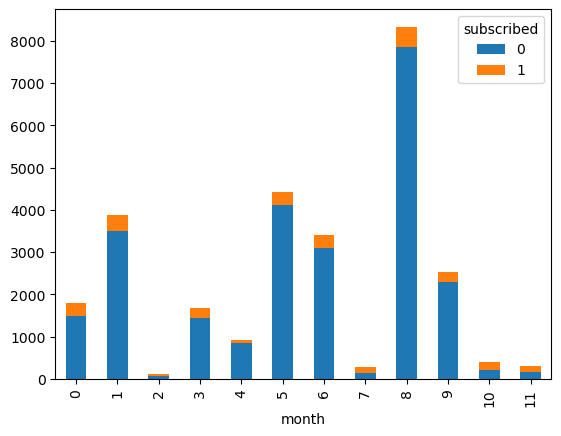

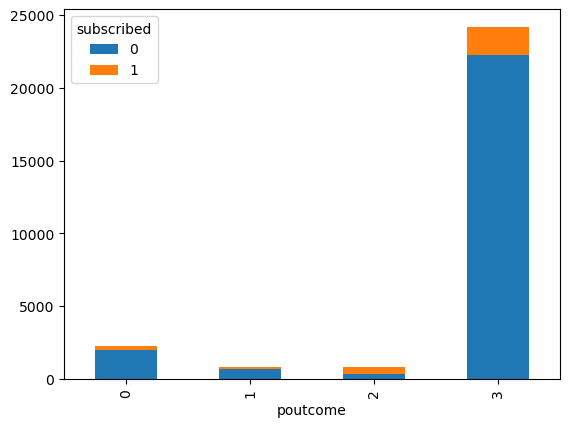

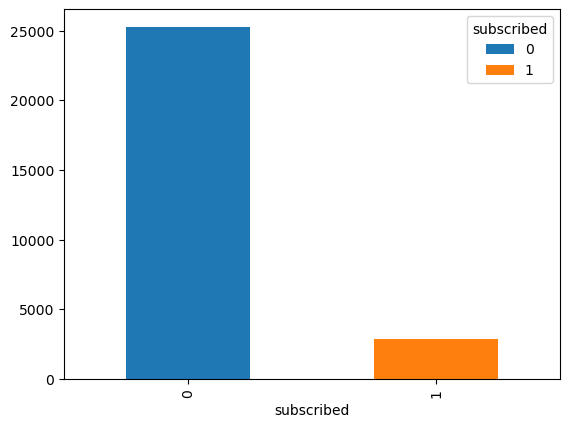

In [20]:
col = ['job',"marital",'education','contact','poutcome',"month","default","housing","loan"]
for i in object_columns:
    df.groupby([i, "subscribed"]).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='subscribed', ylabel='count'>

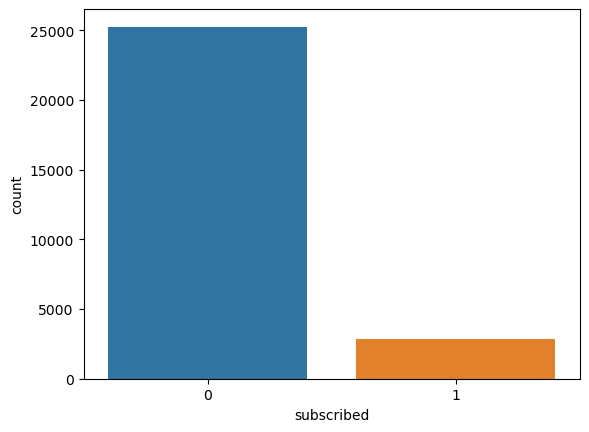

In [21]:
sns.countplot(data=df,x="subscribed")

In [22]:
df.drop("ID",axis=1,inplace=True)

In [23]:
x = df.iloc[:,:-1]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3


In [24]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int32

In [25]:
print("x :",x.shape)
print("y :",y.shape)
print(y.value_counts())

x : (28124, 16)
y : (28124,)
0    25264
1     2860
Name: subscribed, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE
smt =SMOTE()
x,y=smt.fit_resample(x,y)
print("x :",x.shape)
print("y :",y.shape)
print(y.value_counts())

x : (50528, 16)
y : (50528,)
0    25264
1    25264
Name: subscribed, dtype: int64


In [27]:
## feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [28]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [29]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [30]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 16
feature selected: 14


In [31]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,56,0,1,3,1933,0,0,1,19,9,44,2,-1,0
1,31,11,1,1,3,0,0,0,20,5,91,2,-1,0
2,27,7,1,1,891,1,0,0,18,5,240,1,-1,0
3,57,4,0,2,3287,0,0,0,22,6,867,1,84,3
4,31,9,1,1,119,1,0,0,4,3,380,1,-1,0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
st=StandardScaler()
x_new=st.fit_transform(x)

In [34]:
x = pd.DataFrame(x_new,columns=selected_feat)
x.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,1.551724,-1.437318,-0.150133,2.651606,0.383612,-0.756452,-0.328297,0.739430,0.468915,1.294547,-1.174288,-0.072018,-0.473828,-0.436027
1,-0.914339,2.221580,-0.150133,-0.234906,-0.687041,-0.756452,-0.328297,-0.548912,0.595737,-0.071923,-0.976908,-0.072018,-0.473828,-0.436027
2,-1.308909,0.891072,-0.150133,-0.234906,-0.194429,1.321961,-0.328297,-0.548912,0.342092,-0.071923,-0.351172,-0.666813,-0.473828,-0.436027
3,1.650366,-0.106810,-1.820310,1.208350,1.134734,-0.756452,-0.328297,-0.548912,0.849382,0.269694,2.281959,-0.666813,0.674323,2.129462
4,-0.914339,1.556326,-0.150133,-0.234906,-0.622691,1.321961,-0.328297,-0.548912,-1.433420,-0.755158,0.236768,-0.666813,-0.473828,-0.436027


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (40422, 14)
x_test : (10106, 14)
y_train : (40422,)
y_test : (10106,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [37]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [39]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.8597298500816387
confusion_matrix
 [[16897  3334]
 [ 2336 17855]]

classification_report
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     20231
           1       0.84      0.88      0.86     20191

    accuracy                           0.86     40422
   macro avg       0.86      0.86      0.86     40422
weighted avg       0.86      0.86      0.86     40422



In [40]:
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = lg.predict_proba(x_test)[:, 1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 0.8494953492974471
confusion_matrix
 [[4151  882]
 [ 639 4434]]

classification_report
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      5033
           1       0.83      0.87      0.85      5073

    accuracy                           0.85     10106
   macro avg       0.85      0.85      0.85     10106
weighted avg       0.85      0.85      0.85     10106

roc_auc score: 0.9183430360997272


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [44]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

accuracy_score: 1.0
confusion_matrix
 [[20231     0]
 [    0 20191]]

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20231
           1       1.00      1.00      1.00     20191

    accuracy                           1.00     40422
   macro avg       1.00      1.00      1.00     40422
weighted avg       1.00      1.00      1.00     40422



In [45]:
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = rfc.predict_proba(x_test)[:, 1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 0.9337027508410845
confusion_matrix
 [[4576  457]
 [ 213 4860]]

classification_report
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      5033
           1       0.91      0.96      0.94      5073

    accuracy                           0.93     10106
   macro avg       0.93      0.93      0.93     10106
weighted avg       0.93      0.93      0.93     10106

roc_auc score: 0.983342151537679


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [49]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.9275147197070902
confusion_matrix
 [[18104  2127]
 [  803 19388]]

classification_report
               precision    recall  f1-score   support

           0       0.96      0.89      0.93     20231
           1       0.90      0.96      0.93     20191

    accuracy                           0.93     40422
   macro avg       0.93      0.93      0.93     40422
weighted avg       0.93      0.93      0.93     40422



In [50]:
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = knn.predict_proba(x_test)[:, 1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 0.8894716010290916
confusion_matrix
 [[4257  776]
 [ 341 4732]]

classification_report
               precision    recall  f1-score   support

           0       0.93      0.85      0.88      5033
           1       0.86      0.93      0.89      5073

    accuracy                           0.89     10106
   macro avg       0.89      0.89      0.89     10106
weighted avg       0.89      0.89      0.89     10106

roc_auc score: 0.9436453685196723


In [51]:
from sklearn.svm import SVC

In [52]:
svc =SVC()
svc.fit(x_train,y_train)

SVC()

In [53]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [54]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.9010192469447331
confusion_matrix
 [[17674  2557]
 [ 1444 18747]]

classification_report
               precision    recall  f1-score   support

           0       0.92      0.87      0.90     20231
           1       0.88      0.93      0.90     20191

    accuracy                           0.90     40422
   macro avg       0.90      0.90      0.90     40422
weighted avg       0.90      0.90      0.90     40422



In [55]:
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))

accuracy_score: 0.8829408272313477
confusion_matrix
 [[4288  745]
 [ 438 4635]]

classification_report
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      5033
           1       0.86      0.91      0.89      5073

    accuracy                           0.88     10106
   macro avg       0.88      0.88      0.88     10106
weighted avg       0.88      0.88      0.88     10106



In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parma_grid ={
    'n_estimators' : [50,80,100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [8,10,12,14],
    'max_features':['sqrt', 'log2', None]
}
rfc_cv = GridSearchCV(estimator=rfc,param_grid=parma_grid,cv=5,scoring='f1')
rfc_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 12, 14],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 80, 100]},
             scoring='f1')

In [58]:
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'n_estimators': 80}

In [59]:
y_train_pred = rfc_cv.predict(x_train)
y_test_pred = rfc_cv.predict(x_test)

In [60]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

accuracy_score: 0.9604670723863242
confusion_matrix
 [[18878  1353]
 [  245 19946]]

classification_report
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     20231
           1       0.94      0.99      0.96     20191

    accuracy                           0.96     40422
   macro avg       0.96      0.96      0.96     40422
weighted avg       0.96      0.96      0.96     40422



In [61]:
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = rfc_cv.predict_proba(x_test)[:, 1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 0.9194537898278251
confusion_matrix
 [[4441  592]
 [ 222 4851]]

classification_report
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      5033
           1       0.89      0.96      0.92      5073

    accuracy                           0.92     10106
   macro avg       0.92      0.92      0.92     10106
weighted avg       0.92      0.92      0.92     10106

roc_auc score: 0.9719402505263015


In [62]:
X_test = pd.read_csv(r"C:\Users\HP\Downloads\termdeposit_test.csv")
X_test = X_test.drop(["ID","default",'poutcome'],axis=1)
X_test.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,-1,0
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,-1,0
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,-1,0
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,-1,0
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,-1,0


In [63]:
col = ['job', 'marital', 'education', 'housing', 'loan', 'contact','month']
for i in col:
    lb.fit(X_test[i])
    X_test[i] = lb.transform(X_test[i])

In [64]:
Y_new = rfc_cv.predict(X_test)
Y_test = pd.DataFrame(Y_new)

In [65]:
Y_test.value_counts()

0    10041
1     3523
dtype: int64